# Machine Learning Workflow: Data and Algorithm

To deepen our understanding of the machine learning workflow, let us expand the big picture by adding new components. The illustration below highlights the role of algorithms and the division of the dataset into training, validation, and test sets.
<br> <br>
By the end of this laboratory notebook, you are expected to **demonstrate the ML workflow process while applying data splitting.**



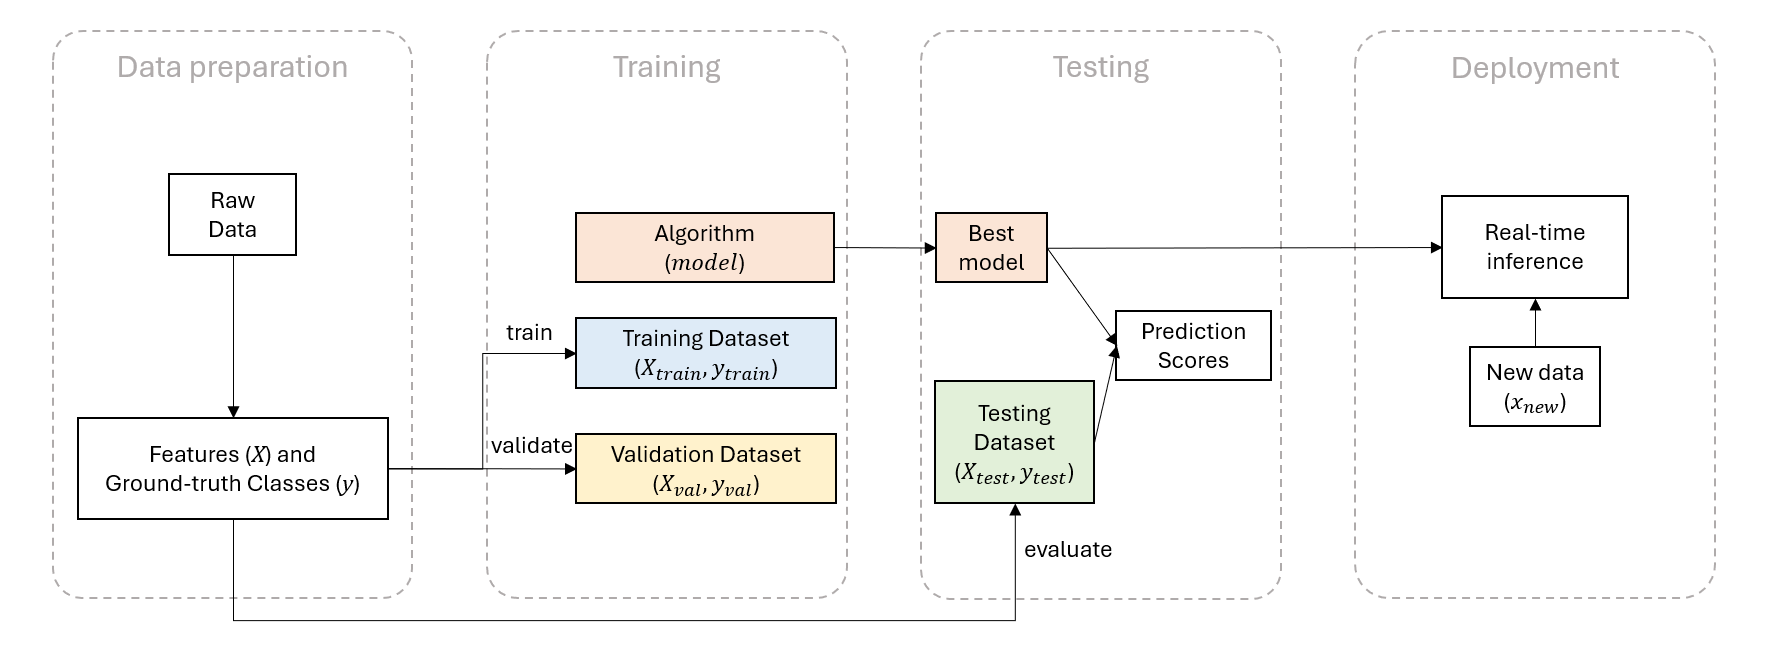

## 1. Data Preparation






We will once again use the MNIST dataset as our `raw data`. However, instead of loading it from `sklearn.datasets`, we will import the dataset from a csv file. This will demonstrate how to load data from external files.

 Thus, you can download the `mnist_digits.csv` from this [GDrive](https://drive.google.com/file/d/1eAmVYcpRvkYM7MXb7vTu95zQjWjS1iet/view?usp=sharing). Now, we begin by loading the MNIST dataset.

In [ ]:
from google.colab import files
import pandas as pd

try: # if csv file is already in Colab, then load
  raw_data = pd.read_csv("mnist_digits.csv")
  print("Loaded mnist_digits.csv into a DataFrame.")
except FileNotFoundError: # otherwise, allow user to upload the CSV file
  uploaded = files.upload()
  for filename in uploaded.keys():
      raw_data = pd.read_csv(filename)
      print(f"Loaded {filename} into a DataFrame.")

The MNIST digits dataset consists of `8x8` pixel images of digits. In the csv file, the columns `0` to `63` indicates the pixel location. For example, the first instance in the csv file contains 64 pixel values. Moreover, the `target` column represents the ground-truth values. In the first instance, the digit is zero.

In [ ]:
raw_data.head(1)

So now, we need to prepare the dataset by determining which are the `features` and which are `ground-truth classes`. <b> For this laboratory notebook, we will assume that our pixel values from column `0` to column `63` are the features. </b> We will represent the array of features as the `X` variable, while the ground-truth classes (or the targets) as the `y` variable.

Recall: From the previous laboratory notebook, the variables `X` and `y` are declared as follows:

`X = raw_data.images.reshape((n_samples, -1))`
<Br>
`y = raw_data.target`

Since we are loading data from a csv file, we will use pandas' `iloc` API for getting the columns values.

In [ ]:
X = raw_data.iloc[:, :-1]
X.head(1)

In [ ]:
y = raw_data.iloc[:, -1]
y.head(1)

The next thing to do is to perform data splitting. In this process, you must split the dataset into `training` set, `validation` set, and `testing` set.

* **Training Set**: For learning and adjusting parameters.
* **Validation Set**: For tuning and assessing the model during training.
* **Testing Set**: For final evaluation on unseen data.



We will split the MNIST dataset into 70% training, 15% validation, and 15% testing. We can perform the data splitting by calling the `train_test_split` twice. The first call is to split training and the rest, while the second call splits the rest into validation and testing sets. The figure below shows the representation of the procedure.

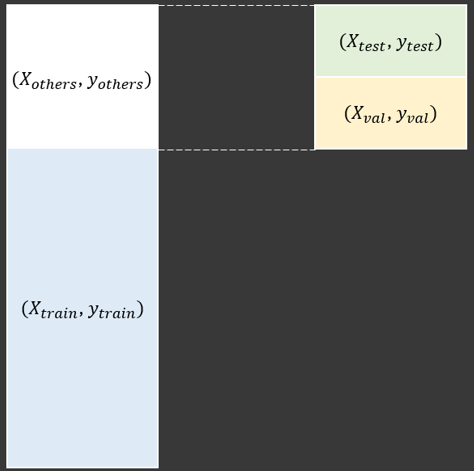



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_others, y_train, y_others = train_test_split(
    X, # features
    y, # targets
    train_size=0.7, # 70% training set
    stratify=y, # split according to even distribution of targets
    shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_others, # features
    y_others, # targets
    test_size = 0.5, # 15% = 0.5 of 30%
    stratify=y_others, # split according to even distribution of targets
    shuffle=True
)

Let us try to visualize if there is an even distribution of the dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences of each digit (0-9) in each set
train_counts = np.bincount(y_train, minlength=10)
val_counts = np.bincount(y_val, minlength=10)
test_counts = np.bincount(y_test, minlength=10)

# Set up bar width and positions for each set
bar_width = 0.25
x = np.arange(10)

# Plotting
plt.figure(figsize=(7, 4))
plt.bar(x, train_counts, width=bar_width, label='Train Set', color='blue')
plt.bar(x + bar_width, val_counts, width=bar_width, label='Validation Set', color='orange')
plt.bar(x + 2 * bar_width, test_counts, width=bar_width, label='Test Set', color='green')

# Adding labels and title
plt.xlabel('Digit Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution in Train, Validation, and Test Sets', fontsize=14)
plt.xticks(x + bar_width, [str(i) for i in range(10)])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Challenge**: Try to remove the `stratify` parameter in the `train_test_split` function earlier and see what happens to the plot. Expectedly, uneven distribution will occur.

Alright! So now, you need to remember that:


1.   `X_train` and `y_train` correspond to the features and targets in the training set.
2.   `X_val` and `y_val` correspond to the features and targets in the validation set.
3.   `X_test` and `y_test` correspond to the features and targets in the testing set.



## 2. Training




By now, the data is ready for training. Again, we will use the same ANN-MLP as we declared in the previous laboratory notebook.

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(16, 8), # means 16 nodes at 1st hidden layer and 8 nodes at 2nd hidden layer
    max_iter=100, # is also known as epoch
)

So now, we already have the important blocks we need for training:


*   `model` is the learning algorithm, which is the ANN-MLP.
*   `(X_train, y_train)` is the training set.
*   `(X_val, y_val)` is the validation set.



We will train the model by calling the `.fit()` function available in Scikit-learn.

In [ ]:
model.fit(X_train, y_train)

Make it a habit to save your model after training, so that you will not lost your progress.

In [ ]:
import joblib

joblib.dump(model, 'mlp_model_e2.pkl')

Observe that the model is saved in the same directory as the csv file.

The next thing to do is to validate the model using the validation dataset. Notice that we use the `X_val` and `y_val`.


In [ ]:
from sklearn import metrics

y_val_pred = model.predict(X_val)
print(f"{metrics.classification_report(y_val, y_val_pred)}")
metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)

## 3. Testing

Next, we evaluate our network with the testing set using `X_test` and `y_test`.

In [ ]:
y_test_pred = model.predict(X_test)
print(f"{metrics.classification_report(y_test, y_test_pred)}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

## 4. Deployment



**Important**: *When deploying your system, you are not required to re-run the training, but you just need to run feedforward prediction using the saved model.*

To simulate the deployment process, we will remove the `model` parameter from RAM. This can be done by calling the `del` keyword in python.

In [ ]:
model # is active before deletion

In [ ]:
del model

In [ ]:
model # is not defined after deletion

The previous code stipulates that the `model` is no longer available at RAM. By this, we can simulate the deployment process by importing the saved model to the environment here.

In [ ]:
model = joblib.load('mlp_model_e2.pkl')

Now let us try to perform `real-time inference` using the new unseen data below.

Recall that the `x_new` in the previous notebook has a data type of `float64`. But here, it contains integers, not floating-point numbers.

**Important**: *The preprocessing steps you apply to your data before training should be the same steps applied during inference.*

In [ ]:
x_new = [
    0,  0,  0,  5,  9,  0,  0,  0,
    0,  0,  2, 14, 14, 22,  0,  0,
    0,  0,  6, 14, 11,  9,  0,  0,
    0,  3, 15,  3, 11,  5,  0,  0,
    0,  8, 11,  0, 13,  6,  2,  0,
    6, 10, 16, 16, 12, 15, 17,  0,
    0,  0,  4, 10, 15,  3,  0,  0,
    0,  0,  0, 11, 13,  2,  0,  0
]
y_new_pred = model.predict([x_new])
print(f"Predicted digit = {y_new_pred[0]}")

The predicted digit must be `4` since `x_new` looks like this photo.

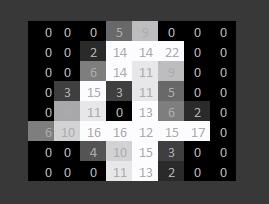

**Challenge**: Try to run this [Python script](https://drive.google.com/file/d/1TkXU8jfWE03bb_N2AUL5_C9Y_vM1Kj7q/view?usp=drive_link) in offline mode, not here in Google Colab. Make sure to place both Python script and trained model (`mlp_model_e2.pkl`) in the same directory.

In [ ]:
# End of laboratory notebook. Nothing follows ...